####  **Car Price Prediction**

**Importing Modules**

In [314]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Dataset**

In [315]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [316]:
df.head(18)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [317]:
# display data
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [318]:
# display first 5 rows
df.head()   

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [319]:
# display last 5 rows
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [320]:
df.shape

(205, 26)

In [321]:
# to check for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [322]:
# display the datatypes of each attribute
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [323]:
# display basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Describing Data**

In [324]:
# describing the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [325]:
df = df.drop(['car_ID','CarName'],axis = 1)
df.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


**Removing Outliers**

<AxesSubplot:xlabel='price'>

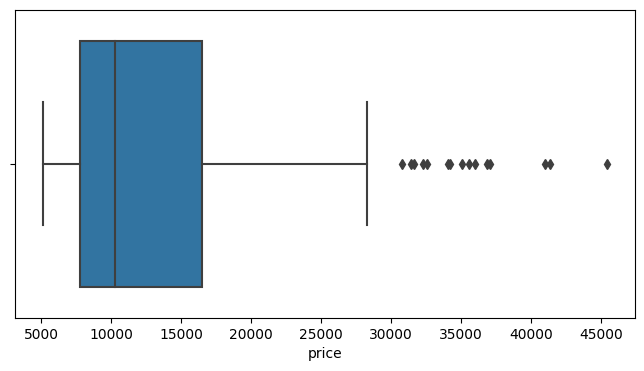

In [326]:
# boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])

In [327]:
sorted(df["price"], reverse = True)

[45400.0,
 41315.0,
 40960.0,
 37028.0,
 36880.0,
 36000.0,
 35550.0,
 35056.0,
 34184.0,
 34028.0,
 32528.0,
 32250.0,
 31600.0,
 31400.5,
 30760.0,
 28248.0,
 28176.0,
 25552.0,
 24565.0,
 23875.0,
 22625.0,
 22470.0,
 22018.0,
 21485.0,
 21105.0,
 20970.0,
 19699.0,
 19045.0,
 18950.0,
 18920.0,
 18620.0,
 18420.0,
 18399.0,
 18344.0,
 18280.0,
 18150.0,
 18150.0,
 17950.0,
 17859.167,
 17710.0,
 17669.0,
 17450.0,
 17199.0,
 17075.0,
 16925.0,
 16900.0,
 16845.0,
 16695.0,
 16630.0,
 16558.0,
 16515.0,
 16503.0,
 16500.0,
 16500.0,
 16430.0,
 15998.0,
 15985.0,
 15750.0,
 15690.0,
 15645.0,
 15580.0,
 15510.0,
 15250.0,
 15040.0,
 14869.0,
 14489.0,
 14399.0,
 13950.0,
 13860.0,
 13845.0,
 13645.0,
 13499.0,
 13499.0,
 13495.0,
 13415.0,
 13295.0,
 13200.0,
 12964.0,
 12945.0,
 12940.0,
 12764.0,
 12629.0,
 12440.0,
 12290.0,
 12170.0,
 11900.0,
 11850.0,
 11845.0,
 11694.0,
 11595.0,
 11549.0,
 11259.0,
 11248.0,
 11245.0,
 11199.0,
 11048.0,
 10945.0,
 10898.0,
 10795.0,
 10698.0

In [328]:
# outliers are removed
df = df[~(df["price"] >= 40000) & (df['price'] <= 45000)]
df.shape

(202, 24)

In [329]:
df.dtypes                                    ######################ROUGHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH>.........................

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

**Exploratory Data Analysis**

In [330]:
# returns unique elements
print(df['fueltype'].unique())
print(df['aspiration'].unique())
print(df['doornumber'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['enginelocation'].unique())
print(df['enginetype'].unique())
print(df['cylindernumber'].unique())
print(df['fuelsystem'].unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


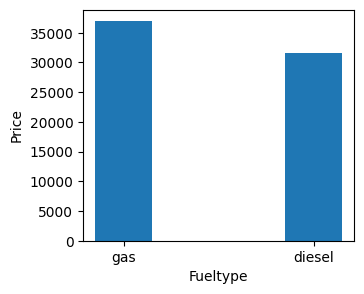

In [331]:
plt.figure(figsize=(3.5,3))
plt.bar(df['fueltype'], df['price'], width=0.3)
plt.xlabel('Fueltype')
plt.ylabel('Price')
plt.show()

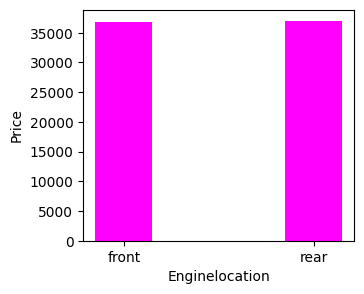

In [332]:
plt.figure(figsize=(3.5,3))
plt.bar(df['enginelocation'], df['price'] ,color = 'Magenta', width=0.3)
plt.xlabel('Enginelocation')
plt.ylabel('Price')
plt.show()

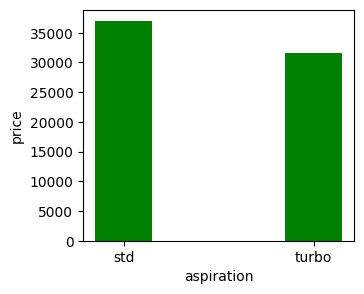

In [333]:
plt.figure(figsize=(3.5,3))
plt.bar(df['aspiration'], df['price'], width=0.3, color='Green')
plt.xlabel('aspiration')
plt.ylabel('price')
plt.show()

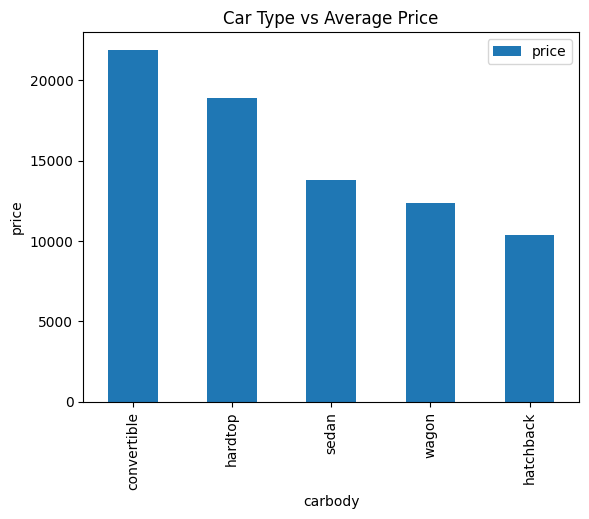

In [334]:
dff=pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
dff.plot.bar()
plt.title('Car Type vs Average Price')
plt.ylabel('price')
plt.show()

In [335]:
print(df["fueltype"].dtype)


object


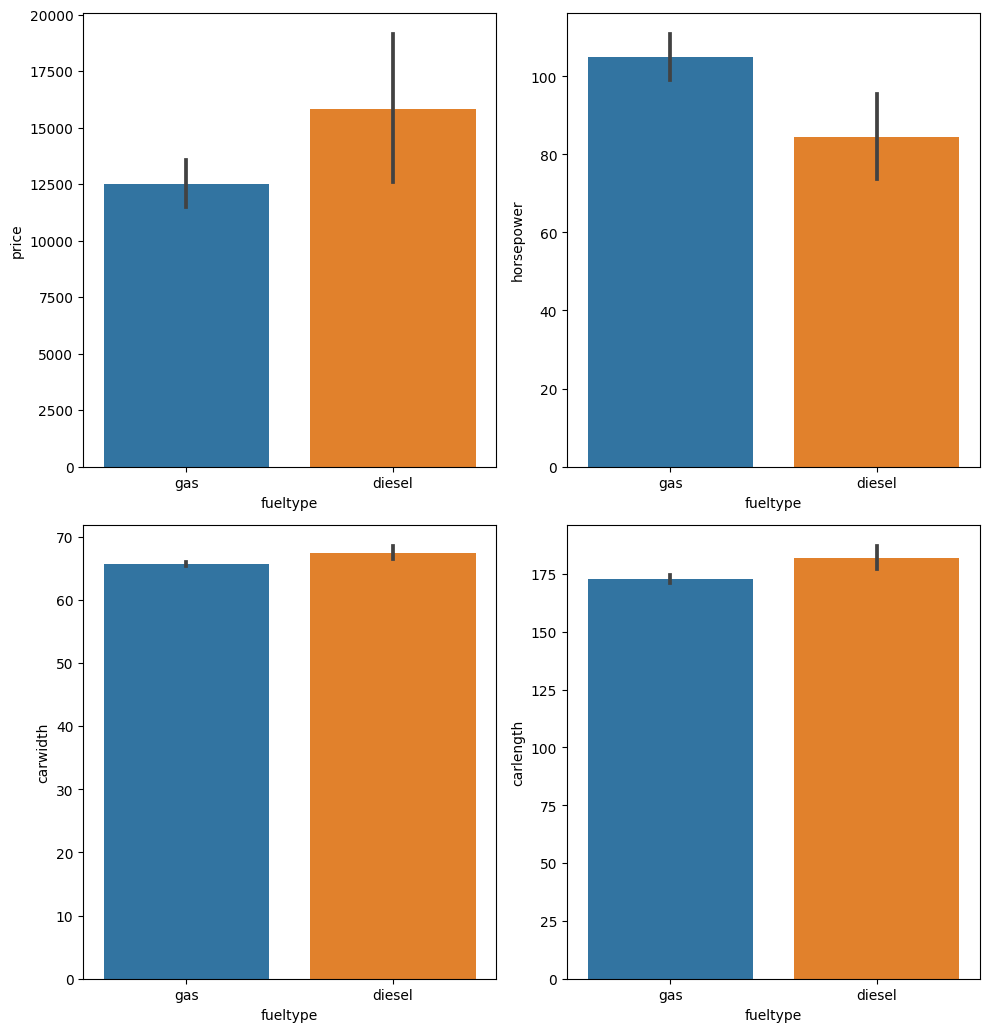

In [336]:
fig = plt.figure(figsize = (10,10) )
plt.subplot(2,2,1)
sns.barplot(data=df, x='fueltype', y='price')
plt.subplot(2,2,2)
sns.barplot(data=df, x='fueltype', y='horsepower')
plt.tight_layout()
plt.subplot(2,2,3)
sns.barplot(x='fueltype', y='carwidth', data=df)
plt.subplot(2,2,4)
sns.barplot(x='fueltype', y='carlength', data=df)
plt.show()

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

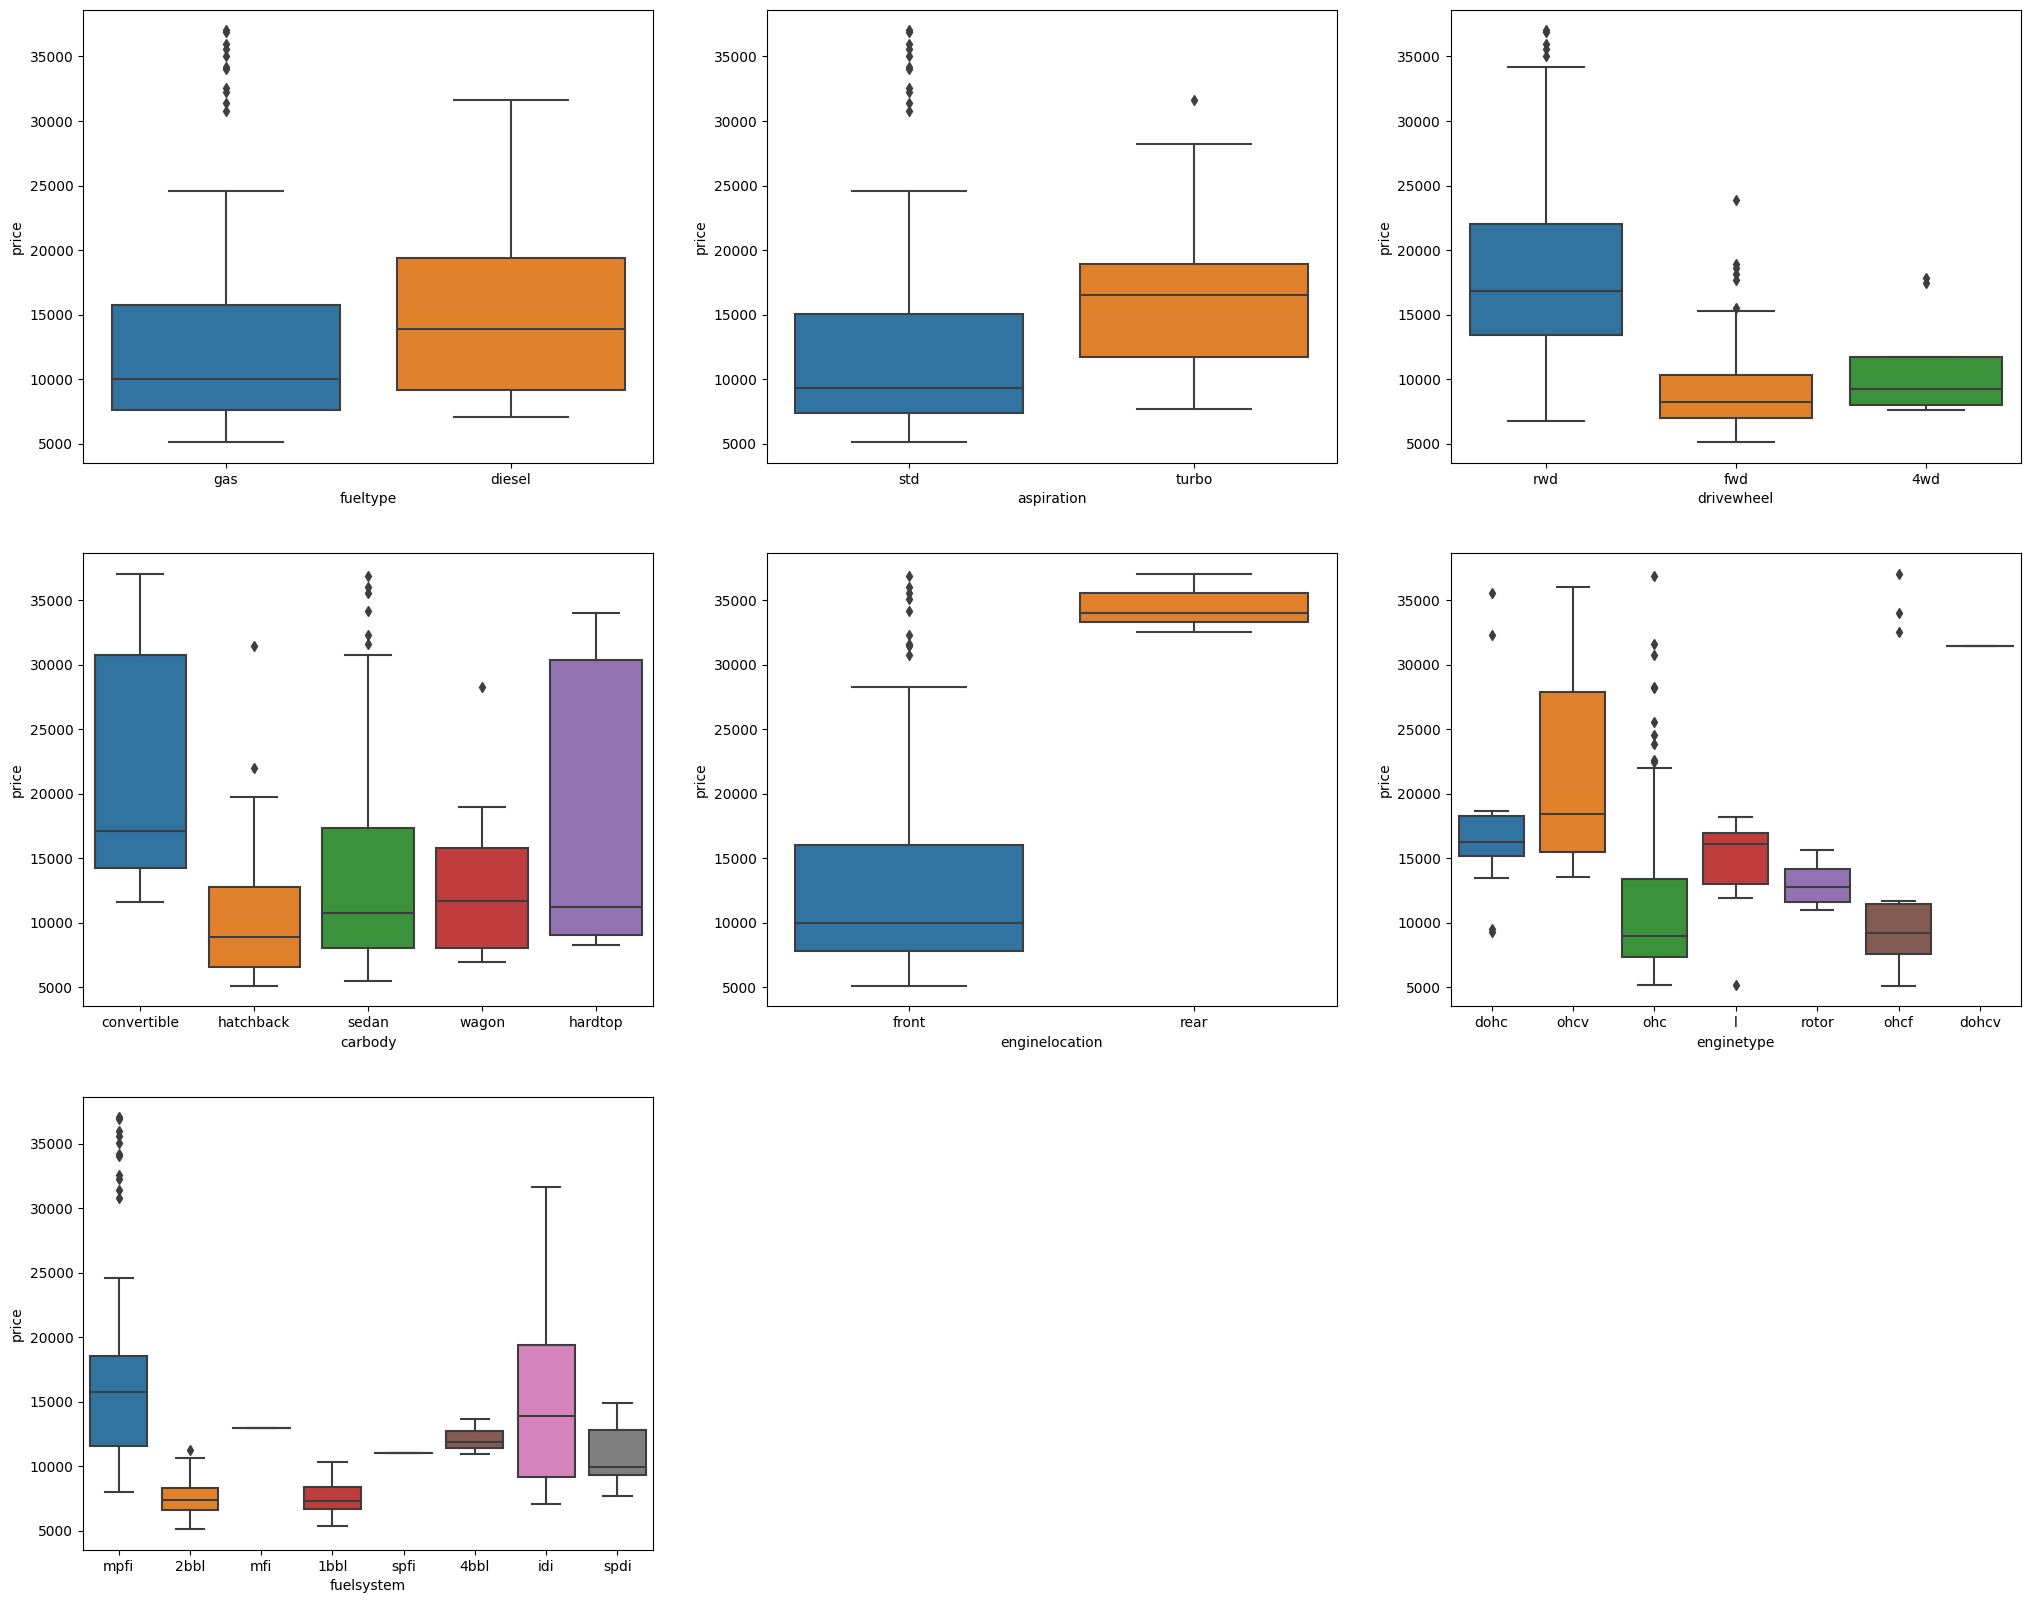

In [337]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y='price', data=df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price' , data = df )
plt.subplot(3,3,3)
sns.boxplot(x = 'drivewheel',y = 'price' , data = df)
plt.subplot (3,3,4)
sns.boxplot(x = 'carbody',y = 'price',data = df)
plt.subplot(3,3,5)
sns.boxplot(x= 'enginelocation',y = 'price',data = df)
plt.subplot(3,3,6)
sns.boxplot(x  = 'enginetype', y = 'price', data =df)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)


**Encoding the Categorical Columns**

In [338]:
df.select_dtypes("object").describe()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,202,202,202,202,202,202,202,202,202
unique,2,2,2,5,3,2,7,7,8
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,182,165,114,94,120,199,147,159,91


In [339]:
df.select_dtypes("number").describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.841584,98.557921,173.658416,65.839109,53.701980,2539.089109,124.727723,3.323663,3.253812,10.174356,102.940594,5129.950495,25.376238,30.940594,12841.834985
std,1.251727,5.774025,11.977926,2.072325,2.449773,505.785849,37.450068,0.267945,0.315641,3.992875,38.626628,476.049767,6.460521,6.748977,7192.112132
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.025000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7778.250000
50%,1.000000,96.900000,173.100000,65.500000,54.100000,2412.000000,115.000000,3.310000,3.280000,9.000000,95.000000,5200.000000,24.500000,30.000000,10221.500000
75%,2.000000,101.200000,181.200000,66.500000,55.500000,2918.750000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.500000,16482.500000
max,3.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,37028.000000


In [340]:
print(df['fueltype'].unique())
print(df['aspiration'].unique())
print(df['doornumber'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['enginelocation'].unique())
print(df['enginetype'].unique())
print(df['cylindernumber'].unique())
print(df['fuelsystem'].unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [341]:
fuelMap = {'gas': 0, 'diesel': 1}
aspMap = {'std': 0, 'turbo': 1}
doorMap = {'two': 2, 'four': 4}
bodyMap = {'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop': 4}
wheelMap = {'rwd': 0, 'fwd': 1, '4wd': 2}
engineLocMap = {'front': 0, 'rear': 1}
engineTypeMap = {'dohc': 0, 'ohcv': 1, 'ohc': 2, 'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6}
cylinderMap = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
fuelSysMap = {'mpfi': 0, '2bbl': 1, 'mfi': 2, '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7}

In [342]:
df['fueltype'] = df['fueltype'].map(fuelMap)
df['fueltype'].unique()

array([0, 1], dtype=int64)

In [343]:
df['aspiration'] = df['aspiration'].map(aspMap)
df['aspiration'].unique()

array([0, 1], dtype=int64)

In [344]:
df['doornumber'] = df['doornumber'].map(doorMap)
df['doornumber'].unique()

array([2, 4], dtype=int64)

In [345]:
df['carbody'] = df['carbody'].map(bodyMap)
df['carbody'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [346]:
df['drivewheel'] = df['drivewheel'].map(wheelMap)
df['drivewheel'].unique()

array([0, 1, 2], dtype=int64)

In [347]:
df['enginelocation'] = df['enginelocation'].map(engineLocMap)
df['enginelocation'].unique()

array([0, 1], dtype=int64)

In [348]:
df['enginetype'] = df['enginetype'].map(engineTypeMap)
df['enginetype'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [349]:
df['cylindernumber'] = df['cylindernumber'].map(cylinderMap)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [350]:
df['fuelsystem'] = df['fuelsystem'].map(fuelSysMap)
df['fuelsystem'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [351]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,2,1,0,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,4,2,1,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,4,2,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


**Splitting Features and Target**

In [352]:
X = df.drop(['price'], axis = 1)
Y = df['price']

In [353]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,0,2,0,0,0,88.6,168.8,64.1,...,4,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,0,0,2,0,0,0,88.6,168.8,64.1,...,4,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,0,0,2,1,0,0,94.5,171.2,65.5,...,6,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,0,0,4,2,1,0,99.8,176.6,66.2,...,4,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,0,0,4,2,2,0,99.4,176.6,66.4,...,5,136,0,3.19,3.40,8.0,115,5500,18,22


In [354]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

**Splitting Data into Train and Test**

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 39)

In [357]:
print("training data shape is:",X_train.shape)
print('training label shape is:',Y_train.shape)
print('testing data shape is:',X_test.shape)
print('testing label shape is:',Y_test.shape)

training data shape is: (161, 23)
training label shape is: (161,)
testing data shape is: (41, 23)
testing label shape is: (41,)


**Model Training**

In [358]:
#Linear Regression
from sklearn.linear_model import LinearRegression

#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [359]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

#Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [360]:
# Prediction on testing data - Linear Regressor
Y_pred1 = lr.predict(X_test)
Y_pred1

array([28375.85983733, 32528.        ,  6274.09299457, 13221.58629379,
       21553.20165139, 10842.26995283, 18416.85098475, 13238.75662039,
        8523.78938302, 10586.69071003,  6186.20986106, 14580.09111562,
       10391.43883412, 19384.59856262, 21966.98115169, 18199.93777202,
        7663.22178743, 14255.22702497, 16390.70121749,  6225.52022675,
       34155.75744311, 13062.33222779,  8340.73351615,  7449.81347753,
        6892.45627373,  9566.46142742, 27792.31390855, 20341.86359968,
       10690.60966452, 13143.38998362, 10035.67882415,  8466.48058935,
        9728.1573979 , 10418.89882629,  8922.73645487,  7995.54462521,
        5758.29204706, 16574.92567105, 10879.91000374, 15353.56699558,
       21983.52258384])

In [361]:
# Prediction on testing data - Random Forest Regressor
Y_pred2 = rf.predict(X_test)
Y_pred2

array([31678.        , 30420.45      ,  7853.1955    , 15330.15666667,
       17221.87      ,  9377.95      , 17357.81      , 12510.9       ,
        8037.96      ,  9414.78      ,  5663.69      , 14343.385     ,
       11759.41      , 19049.035     , 15971.71166667, 17334.61      ,
        6359.15666667, 11802.15833333, 13090.54      ,  7688.1515    ,
       30513.42      , 10946.46      ,  8026.78      ,  7904.63      ,
        6064.255     ,  8168.38      , 15915.71666667, 17555.69      ,
       10331.86      , 14813.33166667, 10410.335     ,  7772.09      ,
        7705.66      ,  8060.83      ,  9938.96      ,  6413.46      ,
        6932.375     , 18699.98      ,  8308.64      , 13149.09      ,
       17002.09      ])

**Evaluating Model**

In [362]:
from sklearn import metrics

In [363]:
scoreLR = metrics.r2_score(Y_test, Y_pred1)
scoreRF = metrics.r2_score(Y_test, Y_pred2)

In [364]:
print(scoreLR, scoreRF)

0.8218985619649606 0.9217133747346111


In [365]:
# print the accuracy (performance)
print("Linear Regressor Accuracy: ",lr.score(X_test,Y_test)*100)

Linear Regressor Accuracy:  82.18985619649605


In [366]:
# print the accuracy (performance)
print("Random Forest Regressor Accuracy: ",rf.score(X_test,Y_test)*100)

Random Forest Regressor Accuracy:  92.17133747346111


In [367]:
accuracy_score = pd.DataFrame({'Models': ['Linear Regressor', 'Random Forest Regressor'],
              'Score': [scoreLR, scoreRF]})

<AxesSubplot:xlabel='Score', ylabel='Models'>

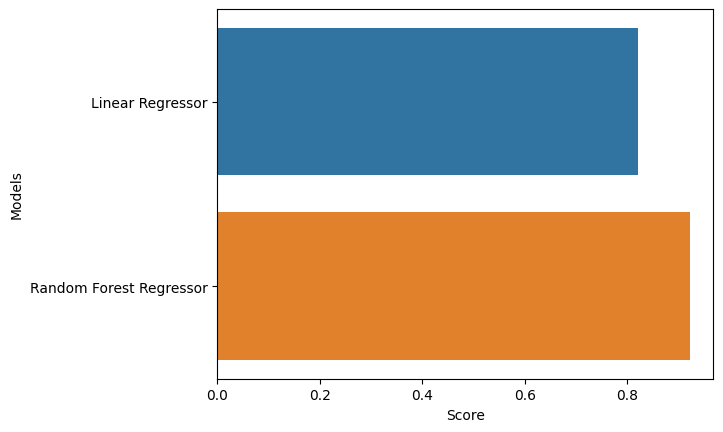

In [368]:
sns.barplot(data=accuracy_score, x="Score", y="Models")